In [66]:
import skimage.io as skio
import skimage as sk
import numpy as np
import scipy
from scipy import signal
from skimage.color import rgb2gray, rgba2rgb
import math
import cv2

<h1>Part 1.1</h1>

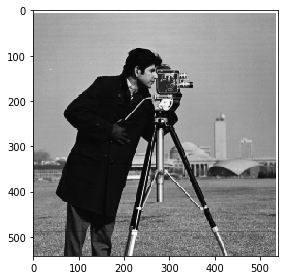

In [23]:
camera = cv2.imread("data/cameraman.png", cv2.IMREAD_GRAYSCALE)
camera_im = sk.img_as_float(camera)
skio.imshow(camera_im)

In [10]:
d_y = np.array([[1], [-1]])
d_x = np.array([[1, -1]])
d_y_pic = signal.convolve2d(camera_im, d_y, boundary='symm', mode='same')
d_x_pic = signal.convolve2d(camera_im, d_x, boundary='symm', mode='same')
gradient_pic = np.sqrt(d_x_pic ** 2 + d_y_pic ** 2)
orientation_pic = np.arctan2(-d_y_pic, d_x_pic) * (gradient_pic > 0.1)
skio.imshow(orientation_pic)
for i in range(len(orientation_pic)):
    for j in range(len(orientation_pic[0])):
        if orientation_pic[i][j] >= 0.05:
            orientation_pic[i][j] = 1
        else:
            orientation_pic[i][j] = 0
skio.imsave("data/1.1_orientation.jpg", orientation_pic)

NameError: name 'camera_im' is not defined

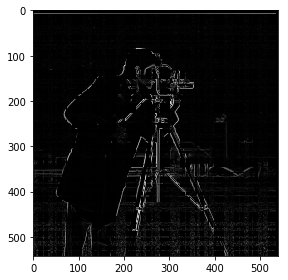

In [25]:
skio.imshow(gradient_pic)
skio.imsave("data/1.1_gradient.jpg", gradient_pic)

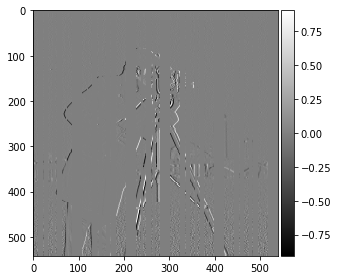

In [20]:
skio.imshow(d_x_pic, cmap="gray")
#skio.imsave("data/1.1_dx.jpg", d_x_pic)

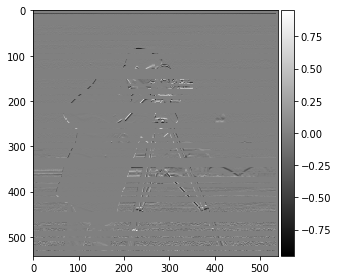

In [21]:
skio.imshow(d_y_pic, cmap="gray")
#skio.imsave("data/1.1_dy.jpg", d_y_pic)

<h1>Part 1.2</h1>

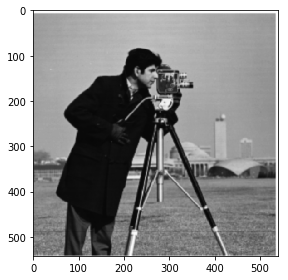

In [54]:
gaussian_mask_1d = cv2.getGaussianKernel(5, 1) 
gaussian_mask_2d = gaussian_mask_1d @ gaussian_mask_1d.T
gaussian_pic = signal.convolve2d(camera_im, gaussian_mask_2d, boundary='symm', mode='same')
skio.imshow(gaussian_pic, cmap="gray")
#skio.imsave("data/gaussian_pic.jpg", gaussian_pic)

In [55]:
gaussian_dx_pic_seperate = signal.convolve2d(gaussian_pic, d_y, boundary='symm', mode='same')
gaussian_dy_pic_seperate = signal.convolve2d(gaussian_pic, d_x, boundary='symm', mode='same')
gradient_pic = np.sqrt(gaussian_dx_pic_seperate ** 2 + gaussian_dy_pic_seperate ** 2)
orientation_pic = np.arctan2(-gaussian_dy_pic_seperate, gaussian_dx_pic_seperate) * (gradient_pic > 0.06)
for i in range(len(orientation_pic)):
    for j in range(len(orientation_pic[0])):
        if orientation_pic[i][j] >= 0.05:
            orientation_pic[i][j] = 1
        else:
            orientation_pic[i][j] = 0

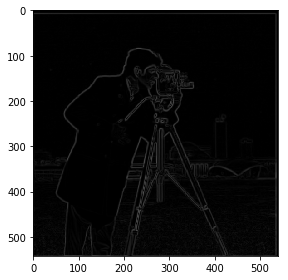

In [56]:
skio.imshow(gradient_pic)
#skio.imsave("data/1.2_gradient.jpg", gradient_pic)

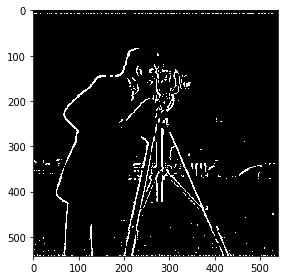

In [57]:
skio.imshow(orientation_pic)
#skio.imsave("data/1.2_orientation.jpg", gradient_pic)

In [58]:
gaussian_dy = signal.convolve2d(gaussian_mask_2d, d_y, boundary='symm', mode='same')
gaussian_dx = signal.convolve2d(gaussian_mask_2d, d_x, boundary='symm', mode='same')
gaussian_dy_pic_combined = signal.convolve2d(camera_im, gaussian_dy, boundary='symm', mode='same')
gaussian_dx_pic_combined = signal.convolve2d(camera_im, gaussian_dx, boundary='symm', mode='same')

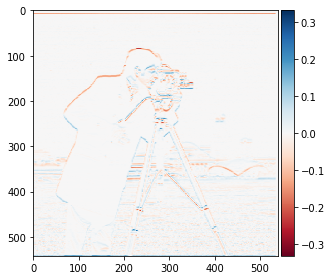

In [59]:
skio.imshow(gaussian_dy_pic_combined)
skio.imsave("data/1.2_gaussian_dy_pic_combined.jpg", gaussian_dy_pic_combined)

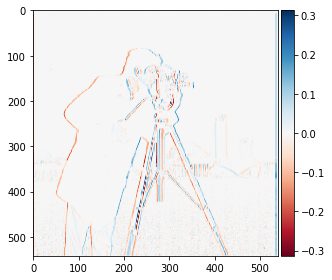

In [60]:
skio.imshow(gaussian_dx_pic_combined)
skio.imsave("data/1.2_gaussian_dx_pic_combined.jpg", gaussian_dx_pic_combined)

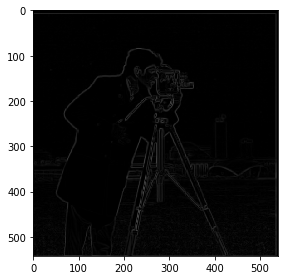

In [61]:
gaussian_gradient_pic_combined = np.sqrt(gaussian_dx_pic_combined ** 2 + gaussian_dy_pic_combined ** 2)
skio.imshow(gaussian_gradient_pic_combined, cmap="gray")
skio.imsave("data/1.2_gaussian_gradient_pic_combined.jpg", gaussian_gradient_pic_combined)

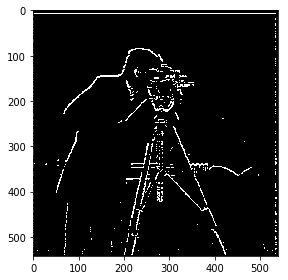

In [62]:
orientation_pic_combined = np.arctan2(-gaussian_dy_pic_combined, gaussian_dx_pic_combined) * (gaussian_gradient_pic_combined > 0.065)
for i in range(len(orientation_pic_combined)):
    for j in range(len(orientation_pic_combined[0])):
        if orientation_pic_combined[i][j] >= 0.01:
            orientation_pic_combined[i][j] = 1
        else:
            orientation_pic_combined[i][j] = 0
skio.imshow(orientation_pic_combined)
skio.imsave("data/1.2_orientation_pic_combined.jpg", orientation_pic_combined)

<h1>Part 1.3</h1>

In [1]:
from scipy import ndimage
from matplotlib import pyplot
from skimage.transform import rescale

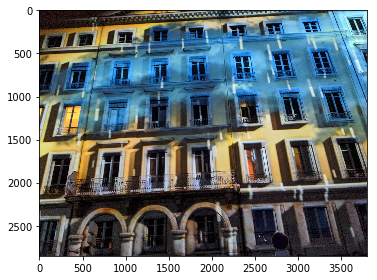

In [4]:
facade = skio.imread("data/facade_raw.jpg")
facade_im = sk.img_as_float(facade)
skio.imshow(facade_im)

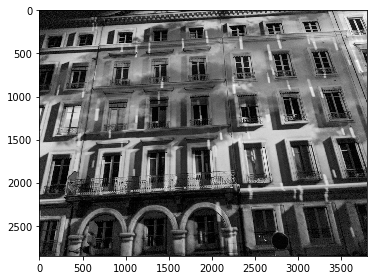

In [7]:
facade_one_color = rgb2gray(facade_im)
#facade_one_color = rescale(facade_one_color, 0.1)
skio.imshow(facade_one_color)

In [6]:
gaussian_mask_1d = cv2.getGaussianKernel(5, 1) 
gaussian_mask_2d = gaussian_mask_1d @ gaussian_mask_1d.T
facade_one_color_gaussian = signal.convolve2d(facade_one_color, gaussian_mask_2d, boundary='symm', mode='same')
skio.imshow(facade_one_color_gaussian)

NameError: name 'facade_one_color' is not defined

In [12]:
def count_valid_angle(temp):
    temp1 = (temp <=95) & (temp >= 85)
    temp2 = (temp<=185) & (temp >=175) 
    temp3 = (temp<=-175) & (temp >=-185)
    temp4 = (temp <= -85) & (temp >= -95)
    temp5 = temp1 | temp2 | temp3 | temp4
    return sum(temp5)[0]

valid_counts = []
for angle in range(-5, 5):
    print(angle)
    facade_rotated = ndimage.interpolation.rotate(facade_one_color_gaussian, angle)
    facade_gaussian_dy = signal.convolve2d(facade_rotated, d_y, boundary='symm', mode='same')[750: 1750, 750:2500]
    facade_gaussian_dx = signal.convolve2d(facade_rotated, d_x, boundary='symm', mode='same')[750: 1750, 750:2500]
    facade_gaussian_gradient_pic = np.sqrt(facade_gaussian_dy ** 2 + facade_gaussian_dx ** 2)
    facade_orientation_pic = np.arctan2(-facade_gaussian_dy, facade_gaussian_dx) * (facade_gaussian_gradient_pic > 0.02)
    facade_reshaped = facade_orientation_pic.reshape((facade_orientation_pic.size, 1))* 180 / np.pi
    valid_counts.append(count_valid_angle(facade_reshaped) / sum(sum(facade_gaussian_gradient_pic > 0.04)))

-5


NameError: name 'facade_one_color_gaussian' is not defined

In [68]:
valid_counts

[0.9201751431458404,
 0.9382498148605283,
 0.9474661518218375,
 0.9302961001444391,
 0.8968682442977538,
 0.8400009115458679,
 0.8022203563765277,
 0.7343216167699346,
 0.6649038903706429,
 0.6062783486068685]

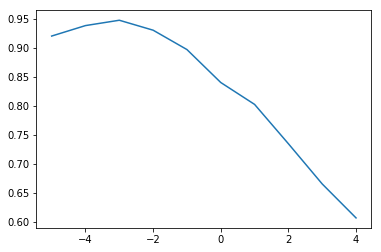

In [74]:
pyplot.plot(range(-5, 5), valid_counts)
#pyplot.savefig('data/1.3_faced_plot.png')

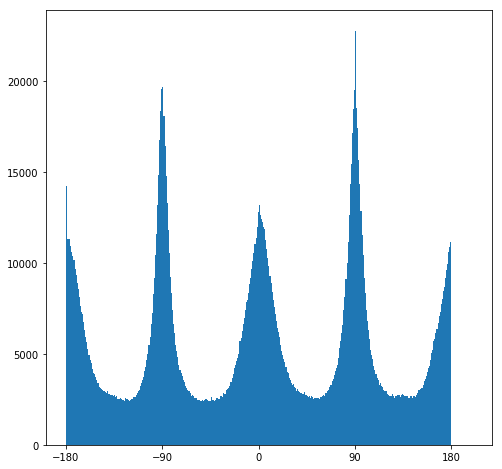

In [71]:
facade_rotated = ndimage.interpolation.rotate(facade_one_color_gaussian, -3)
facade_gaussian_dy = signal.convolve2d(facade_rotated, d_y, boundary='symm', mode='same')
facade_gaussian_dx = signal.convolve2d(facade_rotated, d_x, boundary='symm', mode='same')
facade_gaussian_gradient_pic = np.sqrt(facade_gaussian_dy ** 2 + facade_gaussian_dx ** 2)
facade_orientation_pic = np.arctan2(-facade_gaussian_dy, facade_gaussian_dx) * (facade_gaussian_gradient_pic > 0.02)
facade_reshaped = facade_orientation_pic.reshape((facade_orientation_pic.size, 1))
plotted_value = facade_reshaped[facade_reshaped != 0] * 180 / np.pi
pyplot.figure(figsize=(8,8)) 
n, bins, patches = pyplot.hist(plotted_value, bins=np.arange(-180, 200, 1))
pyplot.xticks(np.array([-180, -90, 0, 90, 180]))
#pyplot.savefig('data/1.3_faced_hist.png')

In [73]:
facade_rotated = ndimage.interpolation.rotate(facade_im, -3)
#skio.imsave("data/1.3_facade.jpg", facade_rotated)

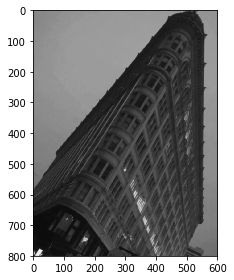

In [16]:
rot_1 = skio.imread("data/1.3_1_1_raw.jpg")
rot_1_im = sk.img_as_float(rot_1)
#temp = ndimage.interpolation.rotate(rot_1_im, -30)
#skio.imshow(temp)
#skio.imsave("data/1.3_1_1_r.jpg", temp[400:1200, 500:1100])
rot_1_im = rgb2gray(rot_1_im)
rot_one_color_gaussian = signal.convolve2d(rot_1_im, gaussian_mask_2d, boundary='symm', mode='same')
skio.imshow(rot_one_color_gaussian)

In [17]:
valid_counts = []
for angle in range(20, 40):
    print(angle)
    rotated = ndimage.interpolation.rotate(rot_one_color_gaussian, angle)
    rotated_gaussian_dy = signal.convolve2d(rotated, d_y, boundary='symm', mode='same')[200: 800, 200:600]
    rotated_gaussian_dx = signal.convolve2d(rotated, d_x, boundary='symm', mode='same')[200: 800, 200:600]
    rotated_gaussian_gradient_pic = np.sqrt(rotated_gaussian_dy ** 2 + rotated_gaussian_dx ** 2)
    rotated_orientation_pic = np.arctan2(-rotated_gaussian_dy, rotated_gaussian_dx) * (rotated_gaussian_gradient_pic > 1e-10)
    rotated_reshaped = rotated_orientation_pic.reshape((rotated_orientation_pic.size, 1))* 180 / np.pi
    valid_counts.append(count_valid_angle(rotated_reshaped) / sum(sum(rotated_gaussian_gradient_pic > 1e-10)))

20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


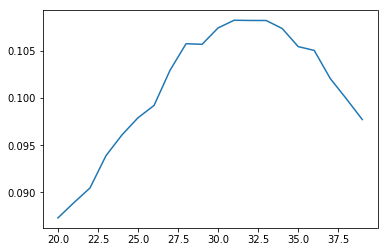

In [18]:
pyplot.plot(range(20, 40), valid_counts)
#pyplot.savefig('data/1.3_lou_plot.png')

In [19]:
rot_1 = skio.imread("data/1.3_1_1_raw.jpg")
rot_1_im = sk.img_as_float(rot_1)
#skio.imsave("data/1.3_1_2.jpg",ndimage.interpolation.rotate(rot_1_im, 31))

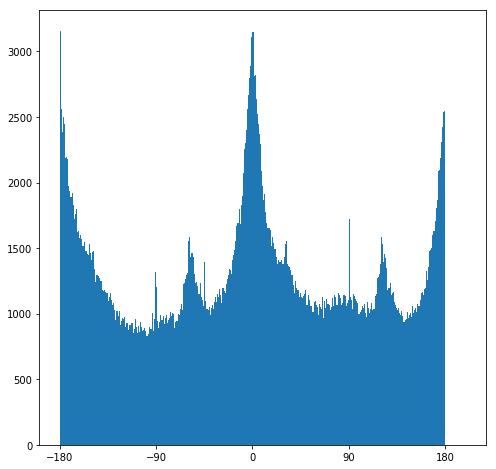

In [79]:
temp = ndimage.interpolation.rotate(rot_one_color_gaussian, 31)
temp_gaussian_dy = signal.convolve2d(temp, d_y, boundary='symm', mode='same')
temp_gaussian_dx = signal.convolve2d(temp, d_x, boundary='symm', mode='same')
temp_gaussian_gradient_pic = np.sqrt(temp_gaussian_dy ** 2 + temp_gaussian_dx ** 2)
temp_orientation_pic = np.arctan2(-temp_gaussian_dy, temp_gaussian_dx) * (temp_gaussian_gradient_pic > 1e-10)
temp_reshaped = temp_orientation_pic.reshape((temp_orientation_pic.size, 1))
plotted_value = temp_reshaped[temp_reshaped != 0] * 180 / np.pi
pyplot.figure(figsize=(8,8)) 
n, bins, patches = pyplot.hist(plotted_value, bins=np.arange(-180, 200, 1))
pyplot.xticks(np.array([-180, -90, 0, 90, 180]))
#pyplot.savefig('data/1.3_lou_hist.png')

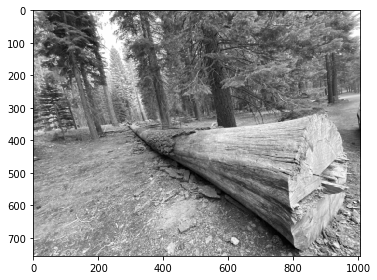

In [21]:
from skimage.transform import rescale
rot_1 = skio.imread("data/1.3_2_raw.jpeg")
rot_1_im = sk.img_as_float(rot_1)
rot_1_im = rgb2gray(rot_1_im)
rot_1_im = rescale(rot_1_im, 0.25)
rot_one_color_gaussian = signal.convolve2d(rot_1_im, gaussian_mask_2d, boundary='symm', mode='same')
skio.imshow(rot_one_color_gaussian)

In [22]:
valid_counts = []
for angle in range(-15, 15):
    rotated = ndimage.interpolation.rotate(rot_one_color_gaussian, angle)
    rotated_gaussian_dy = signal.convolve2d(rotated, d_y, boundary='symm', mode='same')[200: 800, 200:1000]
    rotated_gaussian_dx = signal.convolve2d(rotated, d_x, boundary='symm', mode='same')[200: 800, 200:1000]
    rotated_gaussian_gradient_pic = np.sqrt(rotated_gaussian_dy ** 2 + rotated_gaussian_dx ** 2)
    rotated_orientation_pic = np.arctan2(-rotated_gaussian_dy, rotated_gaussian_dx) * (rotated_gaussian_gradient_pic > 0.2)
    rotated_reshaped = rotated_orientation_pic.reshape((rotated_orientation_pic.size, 1))* 180 / np.pi
    valid_counts.append(count_valid_angle(rotated_reshaped) / sum(sum(rotated_gaussian_gradient_pic > 0.2)))

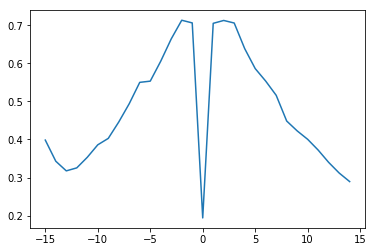

In [23]:
pyplot.plot(range(-15, 15), valid_counts)
#pyplot.savefig('data/1.3_shu_plot.png')

In [84]:
rot_1 = skio.imread("data/1.3_2_raw.jpeg")
rot_1_im = sk.img_as_float(rot_1)
#skio.imsave("data/1.3_2_2.jpg",ndimage.interpolation.rotate(rot_1_im, -1))

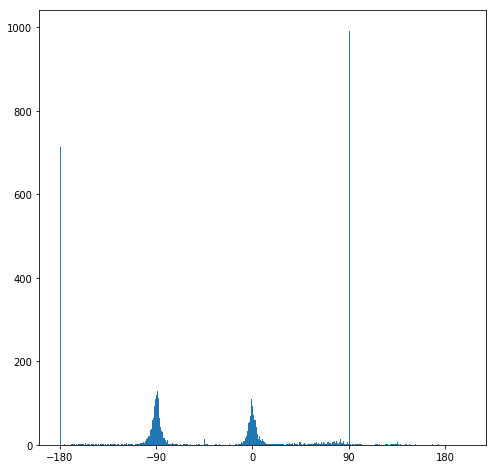

In [85]:
temp = ndimage.interpolation.rotate(rot_one_color_gaussian, -1)
temp_gaussian_dy = signal.convolve2d(temp, d_y, boundary='symm', mode='same')
temp_gaussian_dx = signal.convolve2d(temp, d_x, boundary='symm', mode='same')
temp_gaussian_gradient_pic = np.sqrt(temp_gaussian_dy ** 2 + temp_gaussian_dx ** 2)
temp_orientation_pic = np.arctan2(-temp_gaussian_dy, temp_gaussian_dx) * (temp_gaussian_gradient_pic > 0.2)
temp_reshaped = temp_orientation_pic.reshape((temp_orientation_pic.size, 1))
plotted_value = temp_reshaped[temp_reshaped != 0] * 180 / np.pi
pyplot.figure(figsize=(8,8)) 
n, bins, patches = pyplot.hist(plotted_value, bins=np.arange(-180, 200, 1))
pyplot.xticks(np.array([-180, -90, 0, 90, 180]))
#pyplot.savefig('data/1.3_shu_hist.png')

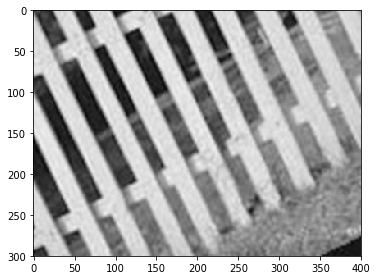

In [25]:
rot_1 = skio.imread("data/1.3_3_1.jpg")
rot_1_im = sk.img_as_float(rot_1)
rot_1_im = rgb2gray(rot_1_im)
#temp = ndimage.interpolation.rotate(rot_1_im, 25)
#skio.imshow(temp)
#skio.imsave("data/1.3_3_1.jpg", temp[100:210, 100:250])
rot_one_color_gaussian = signal.convolve2d(rot_1_im, gaussian_mask_2d, boundary='symm', mode='same')
skio.imshow(rot_one_color_gaussian)

In [26]:
valid_counts = []
for angle in range(-45, -15):
    rotated = ndimage.interpolation.rotate(rot_one_color_gaussian, angle)
    rotated_gaussian_dy = signal.convolve2d(rotated, d_y, boundary='symm', mode='same')[50: 150, 50:200]
    rotated_gaussian_dx = signal.convolve2d(rotated, d_x, boundary='symm', mode='same')[50: 150, 50:200]
    rotated_gaussian_gradient_pic = np.sqrt(rotated_gaussian_dy ** 2 + rotated_gaussian_dx ** 2)
    rotated_orientation_pic = np.arctan2(-rotated_gaussian_dy, rotated_gaussian_dx) * (rotated_gaussian_gradient_pic > 0.1)
    rotated_reshaped = rotated_orientation_pic.reshape((rotated_orientation_pic.size, 1))* 180 / np.pi
    valid_counts.append(count_valid_angle(rotated_reshaped) / sum(sum(rotated_gaussian_gradient_pic > 0.1)))

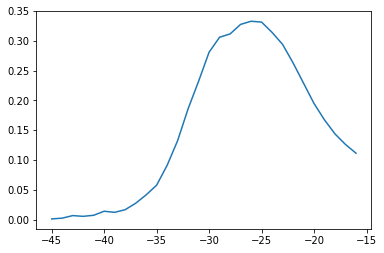

In [27]:
pyplot.plot(range(-45, -15), valid_counts)
#pyplot.savefig('data/1.3_zhalan_plot.png')

In [89]:
rot_1 = skio.imread("data/1.3_3_1.jpg")
rot_1_im = sk.img_as_float(rot_1)
#skio.imsave("data/1.3_3_2.jpg", ndimage.interpolation.rotate(rot_1_im, -27))

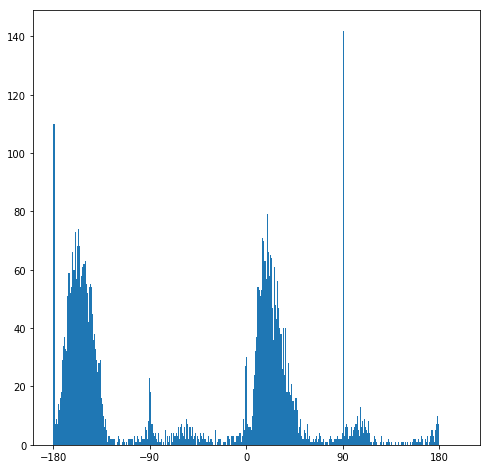

In [91]:
temp = ndimage.interpolation.rotate(rot_one_color_gaussian, -1)
temp_gaussian_dy = signal.convolve2d(temp, d_y, boundary='symm', mode='same')
temp_gaussian_dx = signal.convolve2d(temp, d_x, boundary='symm', mode='same')
temp_gaussian_gradient_pic = np.sqrt(temp_gaussian_dy ** 2 + temp_gaussian_dx ** 2)
temp_orientation_pic = np.arctan2(-temp_gaussian_dy, temp_gaussian_dx) * (temp_gaussian_gradient_pic > 0.1)
temp_reshaped = temp_orientation_pic.reshape((temp_orientation_pic.size, 1))
plotted_value = temp_reshaped[temp_reshaped != 0] * 180 / np.pi
pyplot.figure(figsize=(8,8)) 
n, bins, patches = pyplot.hist(plotted_value, bins=np.arange(-180, 200, 1))
pyplot.xticks(np.array([-180, -90, 0, 90, 180]))
#pyplot.savefig('data/1.3_zhalan_hist.png')

<h1>Part 2.1</h1>

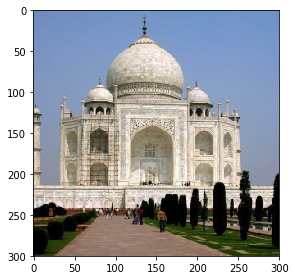

In [28]:
taj = skio.imread("data/taj_raw.jpg")
taj_im = sk.img_as_float(taj)
skio.imshow(taj_im)

In [93]:
taj_gaussian_mask_1d = cv2.getGaussianKernel(5, 1) 
taj_gaussian_mask_2d = taj_gaussian_mask_1d @ taj_gaussian_mask_1d.T
taj_gaussian_mask_2d

array([[0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.02193823, 0.09832033, 0.16210282, 0.09832033, 0.02193823],
       [0.01330621, 0.0596343 , 0.09832033, 0.0596343 , 0.01330621],
       [0.00296902, 0.01330621, 0.02193823, 0.01330621, 0.00296902]])

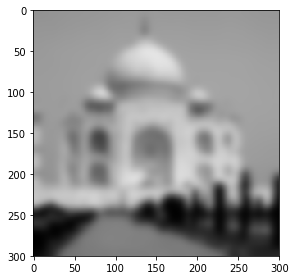

In [94]:
#taj_gaussian = signal.convolve(taj_grey, taj_gaussian_mask_2d, mode='same')
taj_gaussian = scipy.ndimage.gaussian_filter(taj_im, 5)
skio.imshow(taj_gaussian)

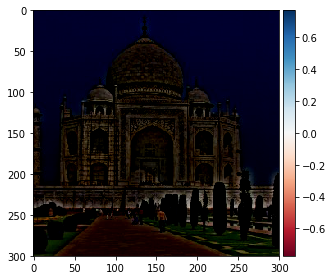

In [95]:
taj_high_freq = taj_im - taj_gaussian
skio.imshow(taj_high_freq)

(300, 300, 3)


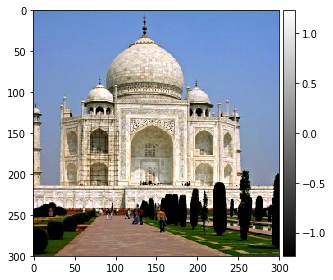

In [97]:
taj_clearer = taj_im + taj_high_freq * 0.3
print(taj_clearer.shape)
skio.imshow(taj_clearer, cmap="gray")
#skio.imsave("data/taj_clearer.jpg", np.clip(taj_clearer, 0, 1))

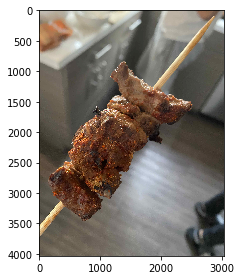

In [29]:
temp = skio.imread("data/2.1_1_raw.jpg")
temp_im = sk.img_as_float(temp)
skio.imshow(temp_im)

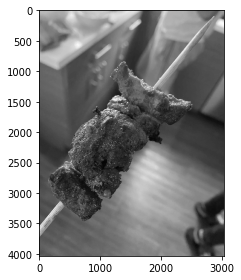

In [30]:
temp_gaussian = scipy.ndimage.gaussian_filter(temp_im, 5)
skio.imshow(temp_gaussian)

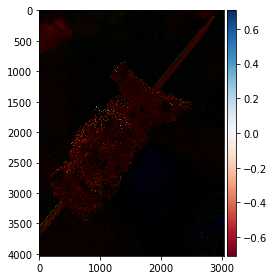

In [31]:
temp_high_freq = temp_im - temp_gaussian
skio.imshow(temp_high_freq)

(4032, 3024, 3)


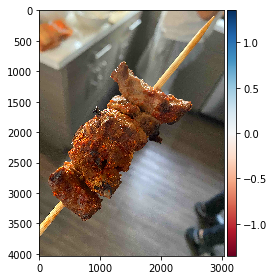

In [32]:
temp_clearer = temp_im + temp_high_freq * 0.5
print(temp_clearer.shape)
skio.imshow(temp_clearer)
#temp_clearer = sk.img_as_int(temp_clearer)
#skio.imsave("data/2.1_1_2.jpg", np.clip(temp_clearer, 0, 1))

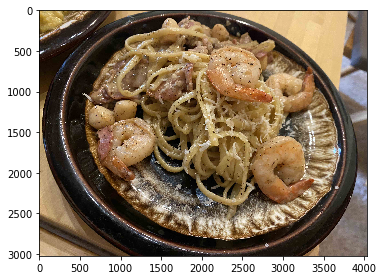

In [83]:
temp = skio.imread("data/2.1_2_raw.jpg")
temp_im = sk.img_as_float(temp)
skio.imshow(temp_im)

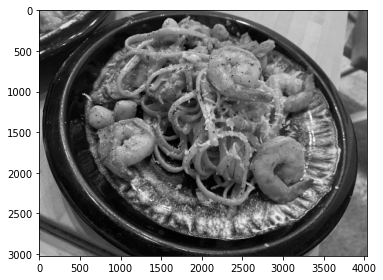

In [84]:
temp_gaussian = scipy.ndimage.gaussian_filter(temp_im, 5)
skio.imshow(temp_gaussian)
skio.imsave("output/spg_blurred.jpg", np.clip(temp_gaussian, 0, 1))

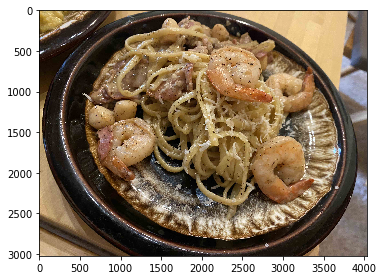

In [85]:
temp = skio.imread("data/2.1_2_raw.jpg")
temp_im = sk.img_as_float(temp)
skio.imshow(temp_im)

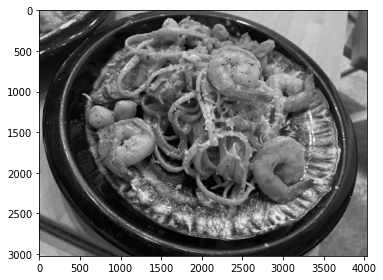

In [86]:
temp = skio.imread("output/spg_blurred.jpg")
temp_im2 = sk.img_as_float(temp)
skio.imshow(temp_im2)

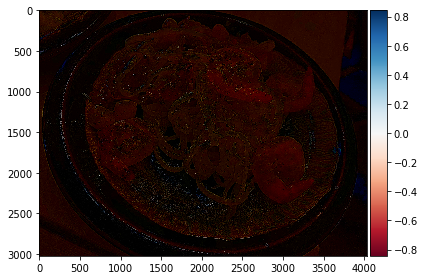

In [87]:
temp_high_freq = temp_im - temp_im2
skio.imshow(temp_high_freq)

(3024, 4032, 3)


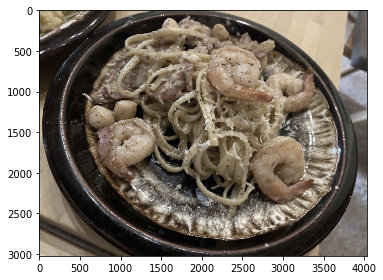

In [89]:
temp_clearer = temp_im2 + temp_high_freq * 0.5
print(temp_clearer.shape)
skio.imshow(temp_clearer)
#temp_clearer = sk.img_as_int(temp_clearer)
#skio.imsave("data/2.1_2_2_blurred.jpeg", np.clip(rgb2gray(temp_clearer), 0, 1))

<h1>Part 2.2</h1>

In [35]:
import math
import numpy as np
import matplotlib.pyplot as plt
import skimage.transform as sktr
from skimage.color import rgb2gray, rgba2rgb
from scipy import signal
import cv2
import skimage.io as skio
import scipy


def get_points(im1, im2):
    p3 = (290, 325)
    p4 = (433, 325)
    p1 = (604, 286)
    p2 = (740, 369)
    return (p1, p2, p3, p4)

def recenter(im, r, c):
    R, C, _ = im.shape
    rpad = (int) (np.abs(2*r+1 - R))
    cpad = (int) (np.abs(2*c+1 - C))
    return np.pad(
        im, [(0 if r > (R-1)/2 else rpad, 0 if r < (R-1)/2 else rpad),
             (0 if c > (C-1)/2 else cpad, 0 if c < (C-1)/2 else cpad),
             (0, 0)], 'constant')

def find_centers(p1, p2):
    cx = np.round(np.mean([p1[0], p2[0]]))
    cy = np.round(np.mean([p1[1], p2[1]]))
    return cx, cy

def align_image_centers(im1, im2, pts):
    p1, p2, p3, p4 = pts
    h1, w1, b1 = im1.shape
    h2, w2, b2 = im2.shape
    
    cx1, cy1 = find_centers(p1, p2)
    cx2, cy2 = find_centers(p3, p4)

    im1 = recenter(im1, cy1, cx1)
    im2 = recenter(im2, cy2, cx2)
    return im1, im2

def rescale_images(im1, im2, pts):
    p1, p2, p3, p4 = pts
    len1 = np.sqrt((p2[1] - p1[1])**2 + (p2[0] - p1[0])**2)
    len2 = np.sqrt((p4[1] - p3[1])**2 + (p4[0] - p3[0])**2)
    dscale = len2/len1
    print(dscale)
    if dscale < 1:
        im1 = sktr.rescale(im1, dscale)
    else:
        im2 = sktr.rescale(im2, 1.0 / dscale)
    print(im1.shape)
    return im1, im2

def rotate_im1(im1, im2, pts):
    p1, p2, p3, p4 = pts
    theta1 = math.atan2(-(p2[1] - p1[1]), (p2[0] - p1[0]))
    theta2 = math.atan2(-(p4[1] - p3[1]), (p4[0] - p3[0]))
    dtheta = theta2 - theta1
    im1 = sktr.rotate(im1, dtheta*180/np.pi)
    return im1, dtheta

def match_img_size(im1, im2):
    # Make images the same size
    h1, w1, c1 = im1.shape
    h2, w2, c2 = im2.shape
    if h1 < h2:
        im2 = im2[int(np.floor((h2-h1)/2.)) : -int(np.ceil((h2-h1)/2.)), :, :]
    elif h1 > h2:
        im1 = im1[int(np.floor((h1-h2)/2.)) : -int(np.ceil((h1-h2)/2.)), :, :]
    if w1 < w2:
        im2 = im2[:, int(np.floor((w2-w1)/2.)) : -int(np.ceil((w2-w1)/2.)), :]
    elif w1 > w2:
        im1 = im1[:, int(np.floor((w1-w2)/2.)) : -int(np.ceil((w1-w2)/2.)), :]
    assert im1.shape == im2.shape
    return im1, im2

def align_images(im1, im2):
    pts = get_points(im1, im2)
    im1, im2 = align_image_centers(im1, im2, pts)
    im1, im2 = rescale_images(im1, im2, pts)
    im1, angle = rotate_im1(im1, im2, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2


if __name__ == "__main__":
    # 1. load the image
    # 2. align the two images by calling align_images
    # Now you are ready to write your own code for creating hybrid images!
    pass

0.8975268582588718
(1306, 1320, 3)


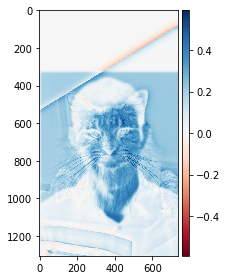

In [37]:
# First load images

# high sf
im1 = plt.imread('data/DerekPicture_raw.jpg')/255.

# low sf
im2 = plt.imread('data/nutmeg_raw.jpg')/255

#im1 = rgb2gray(im1).reshape((im1.shape[0], im1.shape[1], 1))
#im2 = rgb2gray(im2).reshape((im2.shape[0], im2.shape[1], 1))

# Next align images (this code is provided, but may be improved)
im1_aligned, im2_aligned = align_images(im2, im1)

#temp = im1_aligned + im2_aligned
#temp = temp.reshape((temp.shape[0], temp.shape[1]))
#skio.imshow(temp)
## You will provide the code below. Sigma1 and sigma2 are arbitrary 
## cutoff values for the high and low frequencies

def hybrid_image(im1, im2, sigma1, sigma2):
    #gaussian_im1_1d = cv2.getGaussianKernel(31, sigma1) 
    #gaussian_im1_2d = gaussian_im1_1d @ gaussian_im1_1d.T
    #gaussian_im2_1d = cv2.getGaussianKernel(31, sigma2) 
    #gaussian_im2_2d = gaussian_im2_1d @ gaussian_im2_1d.T
    #gaussian_im1 = scipy.ndimage.gaussian_filter(im1, sigma1)
    #gaussian_im2 = scipy.ndimage.gaussian_filter(im2, sigma2)
    gaussian_im1 = scipy.ndimage.gaussian_filter(im1, sigma1)
    gaussian_im2 = scipy.ndimage.gaussian_filter(im2, sigma2)
    skio.imshow(gaussian_im2)
    high_im2 = im2 - gaussian_im2
    #hybrid_img = high_im2 * 0.6  + gaussian_im1 * 0.4
    return gaussian_im1, high_im2
    
sigma1 = 5
sigma2 = 20
hybrid_low, hybrid_high = hybrid_image(im2_aligned, im1_aligned, sigma1, sigma2)
hybrid = hybrid_high * 0.5  + hybrid_low * 0.5
im_out = rgb2gray(hybrid)
skio.imshow(im_out)
#skio.imsave("output/hybrid.jpg", im_out)  
#skio.imshow(hybrid)

## Compute and display Gaussian and Laplacian Pyramids
## You also need to supply this function
N = 5 # suggested number of pyramid levels (your choice)
#pyramids(hybrid, N)

In [ ]:
a = rgb2gray(hybrid_low)
b = cv2.merge([a,a,a])
hybrid = hybrid_high * 0.6  + b * 0.4
#skio.imsave("output/hybrid2.jpg", hybrid)  
c = rgb2gray(hybrid_high)
d = cv2.merge([c,c,c])
hybrid = d * 0.6  + hybrid_low * 0.4
#skio.imsave("output/hybrid3.jpg", hybrid) 

In [ ]:
skio.imshow(hybrid_low)

In [ ]:
skio.imshow(im1_aligned)

In [ ]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(im1_aligned))))))

/Users/appa/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


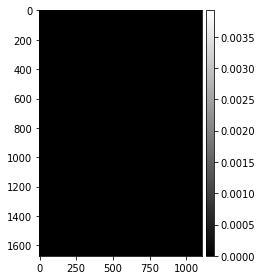

In [60]:
im1 = plt.imread('data/sh_raw.jpg')/255
im1 = im1[:,:, :3]
# low sf
im2 = plt.imread('data/sy_raw.png')/255
im2 = im2[:,:, :3]
#skio.imshow(im2 / 0.015, cmap="gray")
def get_points(im1, im2):
    p3 = (520, 830)
    p4 = (879, 840)
    p1 = (368, 324)
    p2 = (684, 337)
    return (p1, p2, p3, p4)

def align_images(im1, im2):
    pts = get_points(im1, im2)
    im1, im2 = align_image_centers(im1, im2, pts)
    #im1, im2 = rescale_images(im1, im2, pts)
    im1, angle = rotate_im1(im1, im2, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2

# Next align images (this code is provided, but may be improved)
im1_aligned, im2_aligned = align_images(im1, im2)

sigma1 = 5
sigma2 = 20
hybrid_low, hybrid_high = hybrid_image(im2_aligned, im1_aligned, sigma1, sigma2)
hybrid = hybrid_high * 0.67  + hybrid_low * 0.33
im_out = rgb2gray(hybrid)
skio.imshow(hybrid_low, cmap="gray")
#skio.imsave("output/sh_sy.jpg", hybrid)  

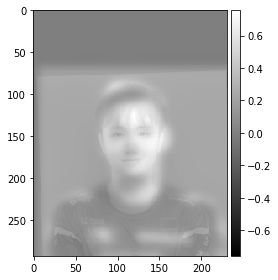

In [61]:
im1 = plt.imread('data/somebody.jpg')/255
im1 = im1[:,:, :3]
# low sf
im2 = plt.imread('data/niko.jpg')/255
im2 = im2[:,:, :3]

def get_points(im1, im2):
    p3 = (94, 79)
    p4 = (124, 78)
    p1 = (94, 70)
    p2 = (122, 70)
    return (p1, p2, p3, p4)

def align_images(im1, im2):
    pts = get_points(im1, im2)
    im1, im2 = align_image_centers(im1, im2, pts)
    #im1, im2 = rescale_images(im1, im2, pts)
    im1, angle = rotate_im1(im1, im2, pts)
    im1, im2 = match_img_size(im1, im2)
    return im1, im2

# Next align images (this code is provided, but may be improved)
im1_aligned, im2_aligned = align_images(im1, im2)

sigma1 = 5
sigma2 = 20
hybrid_low, hybrid_high = hybrid_image(im2_aligned, im1_aligned, sigma1, sigma2)
hybrid = hybrid_high * 0.2  + hybrid_low * 0.8
im_out = rgb2gray(hybrid)
skio.imshow(im_out, cmap="gray")
#skio.imsave("output/somebody_niko.jpg", hybrid)  

In [ ]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(im1_aligned))))))
#plt.savefig("output/somebody_fft.png")

In [ ]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(im2_aligned))))))
#plt.savefig("output/niko_fft.png")

In [ ]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(hybrid_high))))))
#plt.savefig("output/somebody_high_fft.png")

In [ ]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(hybrid_low))))))
#plt.savefig("output/niko_low_fft.png")

In [ ]:
plt.imshow(np.log(np.abs(np.fft.fftshift(np.fft.fft2(rgb2gray(hybrid))))))
#plt.savefig("output/someniko_fft.png")

<h1>2.3

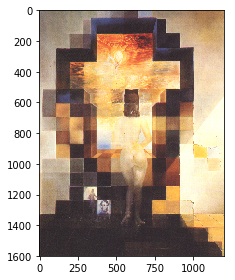

In [62]:
im_gala = plt.imread('data/gala.jpg')/255.
skio.imshow(im_gala)

In [ ]:
def pyramids(im, n):
    # Gaussian Pyramids
    sigma = 1
    fig1 = plt.figure()
    for i in range(n):
        fig1.add_subplot(2, 3, i + 1)
        gaussian_img = scipy.ndimage.filters.gaussian_filter(im, sigma)
        #skio.imsave("output/gala_gaussian_"+str(i)+".jpg", gaussian_img)  
        plt.imshow(gaussian_img, cmap="gray")
        sigma *= 2
    plt.show()

    # Laplacian Pyramid
    fig2 = plt.figure()
    sigma = 1
    fig2.add_subplot(2, 3, 1)
    laplacian_img = im - scipy.ndimage.filters.gaussian_filter(im, sigma)
    #skio.imsave("output/gala_laplacian_"+str(0)+".jpg", laplacian_img)  
    plt.imshow(laplacian_img, cmap="gray")
    for i in range(n-1):
        fig2.add_subplot(2, 3, i + 2)
        laplacian_img = scipy.ndimage.filters.gaussian_filter(im, sigma) - scipy.ndimage.filters.gaussian_filter(im, sigma * 2)
        #skio.imsave("output/gala_laplacian_"+str(i+1)+".jpg", laplacian_img)  
        plt.imshow(laplacian_img, cmap="gray")
        sigma *= 2
    plt.show()

In [ ]:
pyramids(im_gala, 5)

In [ ]:
def pyramids(im, n):
    # Gaussian Pyramids
    sigma = 1
    fig1 = plt.figure()
    for i in range(n):
        fig1.add_subplot(2, 3, i + 1)
        gaussian_img = scipy.ndimage.filters.gaussian_filter(im, sigma)
        #skio.imsave("output/someniko_gaussian_"+str(i)+".jpg", gaussian_img)  
        plt.imshow(gaussian_img, cmap="gray")
        sigma *= 2
    plt.show()

    # Laplacian Pyramid
    fig2 = plt.figure()
    sigma = 1
    fig2.add_subplot(2, 3, 1)
    laplacian_img = im - scipy.ndimage.filters.gaussian_filter(im, sigma)
    #skio.imsave("output/someniko_laplacian_"+str(0)+".jpg", laplacian_img)  
    plt.imshow(laplacian_img, cmap="gray")
    for i in range(n-1):
        fig2.add_subplot(2, 3, i + 2)
        laplacian_img = scipy.ndimage.filters.gaussian_filter(im, sigma) - scipy.ndimage.filters.gaussian_filter(im, sigma * 2)
        #skio.imsave("output/someniko_laplacian_"+str(i+1)+".jpg", laplacian_img)  
        plt.imshow(laplacian_img, cmap="gray")
        sigma *= 2
    plt.show()

In [ ]:
pyramids(hybrid, 5)

<h1>2.4

In [102]:
def pyramids2(im, n):
    # Gaussian Pyramids
    gaussian_pyramids = []
    sigma = 5
    for i in range(n):
        print(i)
        gaussian_img = scipy.ndimage.filters.gaussian_filter(im, sigma)
        gaussian_pyramids.append(gaussian_img)
        sigma *= 4

    # Laplacian Pyramid
    laplacian_pyramids = []
    
    laplacian_img = im - gaussian_pyramids[0]
    laplacian_pyramids.append(laplacian_img)
    
    for i in range(n-1):
        #print(i)
        laplacian_img = gaussian_pyramids[i] - gaussian_pyramids[i + 1]
        laplacian_pyramids.append(laplacian_img)
        
    laplacian_img = scipy.ndimage.filters.gaussian_filter(im, sigma)
    laplacian_pyramids.append(laplacian_img)
    return gaussian_pyramids, laplacian_pyramids

NameError: name 'pyramids2' is not defined

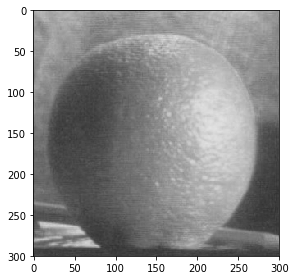

In [63]:
orange = rgb2gray(skio.imread("data/orange_raw.jpg"))
apple = rgb2gray(skio.imread("data/apple_raw.jpg"))
skio.imshow(orange)
mask_row = np.array([255 if i < orange.shape[1] / 2 else 0 for i in range(orange.shape[1])])
mask = np.array([mask_row.copy() for i in range(orange.shape[0])])
n = 6
mask_gaussian, _ = pyramids2(mask, n)
_, orange_laplacian_r = pyramids2(orange[:,:], n)
_, apple_laplacian_r = pyramids2(apple[:,:], n)
#_, orange_laplacian_g = pyramids2(orange[:,:,1], n)
#_, apple_laplacian_g = pyramids2(apple[:,:,1], n)
#_, orange_laplacian_b = pyramids2(orange[:,:,2], n)
#_, apple_laplacian_b = pyramids2(apple[:,:,2], n)

In [ ]:
ls_r = []
for i in range(n):
    ls_r.append(mask_gaussian[i][:,:] * apple_laplacian_r[i][:,:] + (255 - mask_gaussian[i][:,:]) * orange_laplacian_r[i][:,:])

In [ ]:
blended_r = ls_r[0] / max([max(j) for j in ls_r[0]]) / n
for i in range(n - 1):
    blended_r += ls_r[i + 1] / max([max(j) for j in ls_r[i]]) / n
#blended_g = ls_g[0] / max([max(j) for j in ls_g[0]]) / n
#for i in range(n - 1):
#    blended_g += ls_g[i + 1] / max([max(j) for j in ls_g[i]]) / n
#blended_b = ls_b[n - 1] / max([max(j) for j in ls_b[0]]) / n
#for i in range(4):
#    blended_b += ls_b[i + 1] / max([max(j) for j in ls_b[i]]) / n

In [ ]:
skio.imshow(blended_r, cmap="gray")
#skio.imsave("output/oraple.jpg", blended_r)

NameError: name 'pyramids2' is not defined

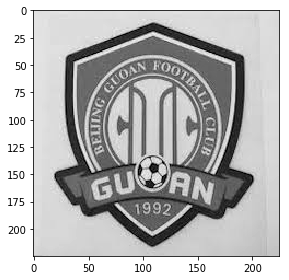

In [64]:
guoan = rgb2gray(skio.imread("data/guoan.jpg"))
jinyu = rgb2gray(skio.imread("data/jinyu.jpg"))
skio.imshow(guoan)
mask_row = np.array([255 if i < guoan.shape[1] / 2 else 0 for i in range(guoan.shape[1])])
mask = np.array([mask_row.copy() for i in range(guoan.shape[0])])
n = 6
mask_gaussian, _ = pyramids2(mask, n)
_, guoan_laplacian_r = pyramids2(guoan, n)
_, jinyu_laplacian_r = pyramids2(jinyu, n)

In [ ]:
ls_r = []
for i in range(n):
    ls_r.append(mask_gaussian[i][:,:] * jinyu_laplacian_r[i][:,:] + (255 - mask_gaussian[i][:,:]) * guoan_laplacian_r[i][:,:])




In [ ]:
blended_r = ls_r[0] / max([max(j) for j in ls_r[0]]) / n
for i in range(n - 1):
    blended_r += ls_r[i + 1] / max([max(j) for j in ls_r[i]]) / n

In [ ]:
skio.imshow(blended_r, cmap="gray")
#skio.imsave("output/guoan_jinyu.jpg",blended_r)

/Users/appa/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Non RGB image conversion is now deprecated. For RGBA images, please use rgb2gray(rgba2rgb(rgb)) instead. In version 0.19, a ValueError will be raised if input image last dimension length is not 3.
  


NameError: name 'pyramids2' is not defined

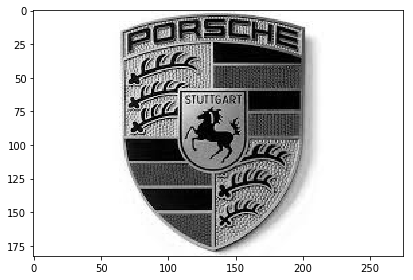

In [65]:
porche = rgb2gray(skio.imread("data/porche.jpg"))
falali = rgb2gray(skio.imread("data/falali.jpg"))
skio.imshow(porche)
mask_row = np.array([255 if i < porche.shape[1] / 2 else 0 for i in range(porche.shape[1])])
mask = np.array([mask_row.copy() for i in range(porche.shape[0])])
n = 6
mask_gaussian, _ = pyramids2(mask, n)
_, porche_laplacian_r = pyramids2(porche, n)
_, falali_laplacian_r = pyramids2(falali, n)

In [ ]:
for i in range(n):
    #skio.imsave("output/porche_laplacian_"+str(i)+".jpg", porche_laplacian_r[i])  

In [ ]:
for i in range(n):
    #skio.imsave("output/falali_laplacian_"+str(i)+".jpg", falali_laplacian_r[i]) 

In [ ]:
ls_r = []
for i in range(n):
    ls_r.append(mask_gaussian[i][:,:] * falali_laplacian_r[i][:,:] + (255 - mask_gaussian[i][:,:]) * porche_laplacian_r[i][:,:])

In [ ]:
blended_r = ls_r[0] / max([max(j) for j in ls_r[0]]) / n
for i in range(n - 1):
    blended_r += ls_r[i + 1] / max([max(j) for j in ls_r[i]]) / n

In [ ]:
for i in range(n):
    #skio.imsave("output/porlali_laplacian_"+str(i)+".jpg", ls_r[i]) 

In [ ]:
skio.imshow(blended_r, cmap="gray")
#skio.imsave("output/porche_falali.jpg",blended_r)

0
1
2
3
0
1
2
3
0
1
2
3


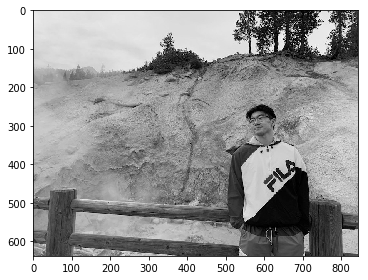

In [103]:
sy_2 = rgb2gray(skio.imread("data/sy_2.jpg"))
somebody_left = rgb2gray(skio.imread("data/somebody_left.jpg"))
mask_2 = skio.imread("data/mask_2.png")[:,:,0]
skio.imshow(sy_2)
n = 4
mask_gaussian, _ = pyramids2(mask_2, n)
_, sy_2_laplacian_r = pyramids2(sy_2, n)
_, somebody_left_laplacian_r = pyramids2(somebody_left, n)

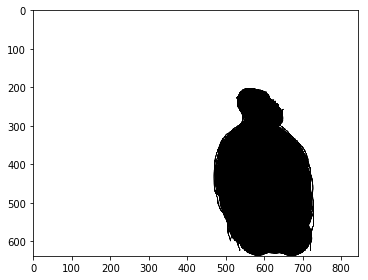

In [94]:
skio.imshow(mask_2)

In [107]:
ls_r = []
for i in range(4):
    ls_r.append(mask_gaussian[i][:,:] * somebody_left_laplacian_r[i][:,:] + (255 - mask_gaussian[i][:,:]) * sy_2_laplacian_r[i][:,:])

In [108]:
blended_r = ls_r[0] / max([max(j) for j in ls_r[0]]) / n
for i in range(n - 1):
    blended_r += ls_r[i + 1] / max([max(j) for j in ls_r[i]]) / n

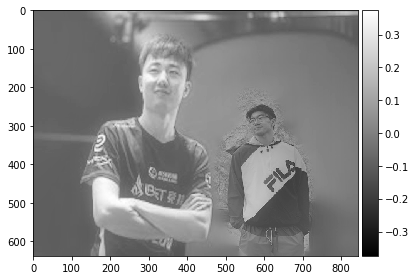

In [116]:
skio.imshow(blended_r, cmap="gray")

skio.imsave("output/sy_somebody.jpg",blended_r)